In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import glob

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
X_valid = pd.read_csv("../input/Testing.csv")
X_train = pd.read_csv("../input/Training.csv")

X_train = X_train.drop(["Unnamed: 133"], axis=1)
y_train = X_train.pop("prognosis")

y_valid = X_valid.pop("prognosis")

files = os.path.join("../input", "*.csv")
files = glob.glob(files)

X = pd.concat(map(pd.read_csv, files), ignore_index=True)
full_df = X.copy()

# y = X.pop("prognosis")
# X = X.drop(["Unnamed: 133"], axis=1)

# # X = pd.read_csv("../input/disease-prediction-using-machine-learning/Testing.csv")
# # y = X.pop("prognosis")



# X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
#                                                                 random_state=0)






# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# model = OneVsRestClassifier(LinearSVC())
model = RandomForestClassifier()
model2 = KNeighborsClassifier()
model3 = ExtraTreeClassifier()
model4 = DecisionTreeClassifier()
# y_train = np.array(y_train).reshape(y_train.shape[0], 1)
# y_valid = np.array(y_valid).reshape(y_valid.shape[0],1)

model.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)



predictions = model.predict_proba(X_valid)
predictions2 = model2.predict_proba(X_valid)
predictions3 = model3.predict_proba(X_valid)
predictions4 = model4.predict_proba(X_valid)

print(model.score(X_valid, y_valid))
print(model2.score(X_valid, y_valid))
print(model3.score(X_valid, y_valid))
print(model4.score(X_valid, y_valid))

final_preds = [[]]

for i in range(len(predictions4)):
    for n in range(len(predictions4[0])):
        if predictions4[i][n] > 0:
            final_preds[i].append([y_train.unique()[n], predictions4[i][n]])
    final_preds.append([])
#print(final_preds)
# for i in X.columns:
#     print(i)

# params = { 'max_depth': [3, 5, 7],
#            'learning_rate': [0.1],
#            'n_estimators': [250, 500, 750]}
# grid_search = GridSearchCV(estimator=model, 
#                    param_grid=params,
#                    scoring='neg_root_mean_squared_error', 
#                    verbose=1)
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# print("Lowest RMSE: ", (grid_search.best_score_))

0.9761904761904762
1.0
0.9761904761904762
0.9761904761904762


In [7]:
list_cols = []
for i in range(len(full_df[full_df["prognosis"] == "Chicken Pox"].sum(axis=0))):
    if not isinstance(full_df[full_df["prognosis"] == "Chicken Pox"].sum(axis=0)[i], str) and full_df[full_df["prognosis"] == "Chicken Pox"].sum(axis=0)[i] > 0:
        list_cols.append(X.columns[i])
predict_d = [[]]
for i in range(132):
    if X_train.columns[i] in list_cols:
        predict_d[0].append(1)
    else:
        predict_d[0].append(0)
print(list_cols)
predictions = model.predict_proba(predict_d)
predictions2 = model2.predict_proba(predict_d)
predictions3 = model3.predict_proba(predict_d)
predictions4 = model4.predict_proba(predict_d)

final_preds = [[]]

for i in range(len(predictions2)):
    for n in range(len(predictions2[0])):
        if predictions2[i][n] > 0:
            final_preds[i].append([y_train.unique()[n], predictions2[i][n]])
    final_preds.append([])
label_predict = []
print(final_preds)

#print(y.unique())
# final_pred = []
# for i in range(len(predictions)):
#     final_pred.append([full_df.columns[i], predictions[i]])
# final_pred = final_pred.sort()
# print(predictions)

[]
[[['Allergy', 0.6], ['Dengue', 0.4]], []]


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but ExtraTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


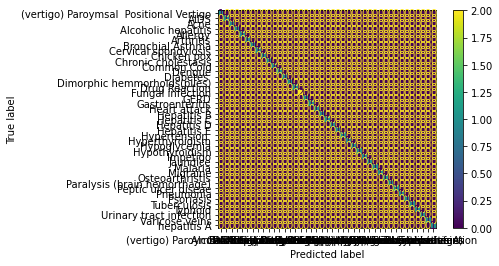

In [8]:
from sklearn.metrics import plot_confusion_matrix
clf = LinearSVC()
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_valid, y_valid)

In [12]:
from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# encoder.fit(full_df["prognosis"])
# full_df["prognosis"] = full_df.transform(full_df["prognosis"])
DATA_PATH = "../input/Training.csv"
files = os.path.join("../input", "*.csv")
files = glob.glob(files)

data = pd.concat(map(pd.read_csv, files), ignore_index=True).dropna(axis=1)
# data = pd.read_csv(DATA_PATH).dropna(axis = 1)
encoder = LabelEncoder()
encoder.fit(data["prognosis"])
data["prognosis"] = encoder.transform(data["prognosis"])

X = data
y = data.pop("prognosis")
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 24)
model_rf = model
model_knn = model2
model_et = model3
model_dt = model4

model_rf.fit(X, y)
model_knn.fit(X, y)
model_et.fit(X, y)
model_dt.fit(X, y)

# print(model.score(X_test, y_test))
# print(model2.score(X_test, y_test))
# print(model3.score(X_test, y_test))
# print(model4.score(X_test, y_test))


symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {"symptom_index":symptom_index,"predictions_classes":encoder.classes_}

{'Itching': 0, 'Skin Rash': 1, 'Nodal Skin Eruptions': 2, 'Continuous Sneezing': 3, 'Shivering': 4, 'Chills': 5, 'Joint Pain': 6, 'Stomach Pain': 7, 'Acidity': 8, 'Ulcers On Tongue': 9, 'Muscle Wasting': 10, 'Vomiting': 11, 'Burning Micturition': 12, 'Spotting  urination': 13, 'Fatigue': 14, 'Weight Gain': 15, 'Anxiety': 16, 'Cold Hands And Feets': 17, 'Mood Swings': 18, 'Weight Loss': 19, 'Restlessness': 20, 'Lethargy': 21, 'Patches In Throat': 22, 'Irregular Sugar Level': 23, 'Cough': 24, 'High Fever': 25, 'Sunken Eyes': 26, 'Breathlessness': 27, 'Sweating': 28, 'Dehydration': 29, 'Indigestion': 30, 'Headache': 31, 'Yellowish Skin': 32, 'Dark Urine': 33, 'Nausea': 34, 'Loss Of Appetite': 35, 'Pain Behind The Eyes': 36, 'Back Pain': 37, 'Constipation': 38, 'Abdominal Pain': 39, 'Diarrhoea': 40, 'Mild Fever': 41, 'Yellow Urine': 42, 'Yellowing Of Eyes': 43, 'Acute Liver Failure': 44, 'Fluid Overload': 45, 'Swelling Of Stomach': 46, 'Swelled Lymph Nodes': 47, 'Malaise': 48, 'Blurred And

In [10]:
def predict_disease_from_symptom(symptom_list):
    symptoms = {'itching': 0, 'skin_rash': 0, 'nodal_skin_eruptions': 0, 'continuous_sneezing': 0,
                'shivering': 0, 'chills': 0, 'joint_pain': 0, 'stomach_pain': 0, 'acidity': 0, 'ulcers_on_tongue': 0,
                'muscle_wasting': 0, 'vomiting': 0, 'burning_micturition': 0, 'spotting_ urination': 0, 'fatigue': 0,
                'weight_gain': 0, 'anxiety': 0, 'cold_hands_and_feets': 0, 'mood_swings': 0, 'weight_loss': 0,
                'restlessness': 0, 'lethargy': 0, 'patches_in_throat': 0, 'irregular_sugar_level': 0, 'cough': 0,
                'high_fever': 0, 'sunken_eyes': 0, 'breathlessness': 0, 'sweating': 0, 'dehydration': 0,
                'indigestion': 0, 'headache': 0, 'yellowish_skin': 0, 'dark_urine': 0, 'nausea': 0, 'loss_of_appetite': 0,
                'pain_behind_the_eyes': 0, 'back_pain': 0, 'constipation': 0, 'abdominal_pain': 0, 'diarrhoea': 0, 'mild_fever': 0,
                'yellow_urine': 0, 'yellowing_of_eyes': 0, 'acute_liver_failure': 0, 'fluid_overload': 0, 'swelling_of_stomach': 0,
                'swelled_lymph_nodes': 0, 'malaise': 0, 'blurred_and_distorted_vision': 0, 'phlegm': 0, 'throat_irritation': 0,
                'redness_of_eyes': 0, 'sinus_pressure': 0, 'runny_nose': 0, 'congestion': 0, 'chest_pain': 0, 'weakness_in_limbs': 0,
                'fast_heart_rate': 0, 'pain_during_bowel_movements': 0, 'pain_in_anal_region': 0, 'bloody_stool': 0,
                'irritation_in_anus': 0, 'neck_pain': 0, 'dizziness': 0, 'cramps': 0, 'bruising': 0, 'obesity': 0, 'swollen_legs': 0,
                'swollen_blood_vessels': 0, 'puffy_face_and_eyes': 0, 'enlarged_thyroid': 0, 'brittle_nails': 0, 'swollen_extremeties': 0,
                'excessive_hunger': 0, 'extra_marital_contacts': 0, 'drying_and_tingling_lips': 0, 'slurred_speech': 0,
                'knee_pain': 0, 'hip_joint_pain': 0, 'muscle_weakness': 0, 'stiff_neck': 0, 'swelling_joints': 0, 'movement_stiffness': 0,
                'spinning_movements': 0, 'loss_of_balance': 0, 'unsteadiness': 0, 'weakness_of_one_body_side': 0, 'loss_of_smell': 0,
                'bladder_discomfort': 0, 'foul_smell_of urine': 0, 'continuous_feel_of_urine': 0, 'passage_of_gases': 0, 'internal_itching': 0,
                'toxic_look_(typhos)': 0, 'depression': 0, 'irritability': 0, 'muscle_pain': 0, 'altered_sensorium': 0,
                'red_spots_over_body': 0, 'belly_pain': 0, 'abnormal_menstruation': 0, 'dischromic _patches': 0, 'watering_from_eyes': 0,
                'increased_appetite': 0, 'polyuria': 0, 'family_history': 0, 'mucoid_sputum': 0, 'rusty_sputum': 0, 'lack_of_concentration': 0,
                'visual_disturbances': 0, 'receiving_blood_transfusion': 0, 'receiving_unsterile_injections': 0, 'coma': 0,
                'stomach_bleeding': 0, 'distention_of_abdomen': 0, 'history_of_alcohol_consumption': 0, 'fluid_overload.1': 0,
                'blood_in_sputum': 0, 'prominent_veins_on_calf': 0, 'palpitations': 0, 'painful_walking': 0, 'pus_filled_pimples': 0,
                'blackheads': 0, 'scurring': 0, 'skin_peeling': 0, 'silver_like_dusting': 0, 'small_dents_in_nails': 0, 'inflammatory_nails': 0,
                'blister': 0, 'red_sore_around_nose': 0, 'yellow_crust_ooze': 0}
#     symptoms = {}
#     for i in range(len(X_train.columns)):
#         symptoms[X_train.columns[i]] = 0
    
    # Set value to 1 for corresponding symptoms
    for s in symptom_list:
        symptoms[s] = 1
    df_test = pd.DataFrame(columns=list(symptoms.keys()))
    df_test.loc[0] = np.array(list(symptoms.values()))
    print(df_test)
    predictions = model.predict_proba(df_test)
    predictions2 = model2.predict_proba(df_test)
    predictions3 = model3.predict_proba(df_test)
    predictions4 = model4.predict_proba(df_test)
    
    choose_pred = predictions4

    final_preds = [[]]

    for i in range(len(choose_pred)):
        for n in range(len(choose_pred[0])):
            if choose_pred[i][n] > 0:
                final_preds[i].append([data_dict["predictions_classes"][n], choose_pred[i][n]])
        final_preds.append([])
    return final_preds
predict_disease_from_symptom(list_cols)

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        0          0                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   

   pus_filled_pimples  blackheads  scurring  skin_peeling  \
0                   0           0         0             0   

   silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
0                    0                     0                   0        0   

   red_sore_around_nose  yellow_crust_ooze  
0                     0                  0  

[1 rows x 132 columns]


[[['Psoriasis', 1.0]], []]

In [11]:
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
# creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
    #print(input_data)
    # for i in range(len(input_data)):
    #     if input_data[i] > 0:
    #         print(X.columns[i])
# reshaping the input data and converting it
# into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
    predictions_rf = model_rf.predict_proba(input_data)
    predictions_knn = model_knn.predict_proba(input_data)
    predictions_et = model_et.predict_proba(input_data)
    predictions_dt = model_dt.predict_proba(input_data)
    
    final_preds_rf = [[]]
    final_preds_knn = [[]]
    final_preds_et = [[]]
    final_preds_dt = [[]]
    
    #Random Forest Predictions
    for i in range(len(predictions_rf)):
        for n in range(len(predictions_rf[0])):
            if predictions_rf[i][n] > 0:
                final_preds_rf[i].append([data_dict["predictions_classes"][n], predictions_rf[i][n]])
        final_preds_rf.append([])
        
    #KNN Predictions    
    for i in range(len(predictions_knn)):
        for n in range(len(predictions_knn[0])):
            if predictions_rf[i][n] > 0:
                final_preds_knn[i].append([data_dict["predictions_classes"][n], predictions_knn[i][n]])
        final_preds_knn.append([])
    
    #Extra Tree Predictions
    for i in range(len(predictions_et)):
        for n in range(len(predictions_et[0])):
            if predictions_et[i][n] > 0:
                final_preds_et[i].append([data_dict["predictions_classes"][n], predictions_et[i][n]])
        final_preds_et.append([])
    
    #Decision Tree Predictions
    for i in range(len(predictions_dt)):
        for n in range(len(predictions_dt[0])):
            if predictions_dt[i][n] > 0:
                final_preds_dt[i].append([data_dict["predictions_classes"][n], predictions_dt[i][n]])
        final_preds_dt.append([])

    
    #np.sort(final_preds_rf, axis=0)
    
    
    print(final_preds_rf)
    print(final_preds_knn)
    print(final_preds_dt)
    print(final_preds_et)
    
    

predictDisease("Cough,Weight Loss,Sweating,High Fever,Chills,Fatigue")

[[['AIDS', 0.02], ['Allergy', 0.06], ['Bronchial Asthma', 0.16], ['GERD', 0.06], ['Heart attack', 0.1], ['Hepatitis C', 0.01], ['Hyperthyroidism', 0.09], ['Hypoglycemia', 0.01], ['Jaundice', 0.18], ['Malaria', 0.12], ['Pneumonia', 0.08], ['Tuberculosis', 0.03], ['Typhoid', 0.06], ['Varicose veins', 0.02]], []]
[[['AIDS', 0.0], ['Allergy', 0.0], ['Bronchial Asthma', 1.0], ['GERD', 0.0], ['Heart attack', 0.0], ['Hepatitis C', 0.0], ['Hyperthyroidism', 0.0], ['Hypoglycemia', 0.0], ['Jaundice', 0.0], ['Malaria', 0.0], ['Pneumonia', 0.0], ['Tuberculosis', 0.0], ['Typhoid', 0.0], ['Varicose veins', 0.0]], []]
[[['Typhoid', 1.0]], []]
[[['Jaundice', 1.0]], []]


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but ExtraTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
